<a href="https://colab.research.google.com/github/MohammadAli-Balaj/Literature_Generation-With-Markov-Chains/blob/main/Markov_Chain_Book_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#**Book Generation With Markov Chains**



---


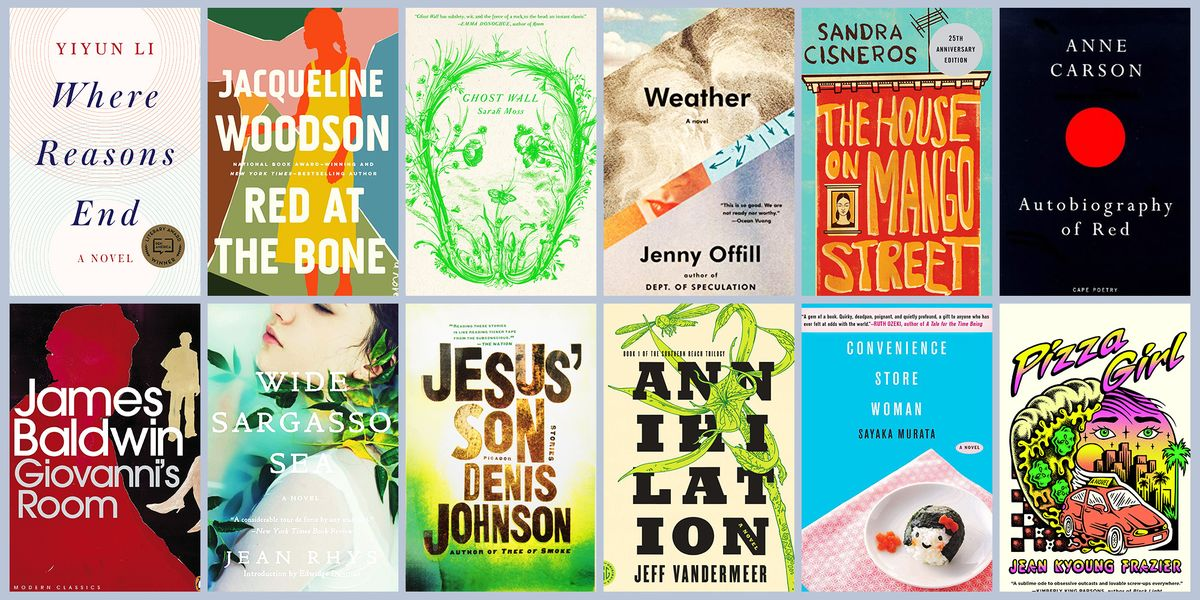

---


## Advanced Topics - Applied Data Science
## Supervisor: Em. O. Univ.-Prof. Dr. Jürgen Pilz
### Author: Mohammad-Ali Balaj



---




## Importing the Natural Language Toolkit or nltk for short, in order to implement a Python application to work with natural language data which includes over 50 corpora and lexical resources: 

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> u

Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Importing of needed Python libraries:

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import random
import string
import os
import re

## Mounting at data (the dataset is already uploaded in google drive):

In [3]:
from google.colab import drive
drive.mount('data',force_remount=True)

Mounted at data


## The Books in plain text dataset, is published by Data Storm in Kaggle. It is an open-source dataset (license: CC0: Public Domain) and contains about 18000 books in text format. A subset of this dataset is used in this project:

In [4]:
path="/content/data/MyDrive/epubtx"

## Reading every book:
### As shown below there are 2678659 lines of book's content in total!

In [5]:
def hittingBooks(path):
    text=[]
    for root,subDirs,fileNames in os.walk(path):
        for file in fileNames:
            with open (path+"//"+file) as f:
                for line in f:
                    line=line.strip()
                    if line == "----------": break
                    if line != "":text.append(line)
    return text

books=hittingBooks(path)
print("number of lines= ",len(books))

number of lines=  2678659


## Text cleaning process:

In [6]:
def clean_text(text):
    cleaned_text = []
    for line in text:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]
        cleaned_text+=words
    return cleaned_text


cleaned_stories = clean_text(books)
print("number of words = ", len(cleaned_stories))

number of words =  88745676


## Creating the Markov model including the calculation of transition probabilities:

In [7]:
def make_markov_model(cleaned_stories, n_gram=2):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j] + " "
            next_state += cleaned_stories[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
        
    return markov_model

## Giving the cleaned texts from the previous step, as parameter to the implemented Markov Model:

In [8]:
markov_model = make_markov_model(cleaned_stories)

## As shown below we have 10189936 states in total:

In [9]:
print("number of states = ", len(markov_model.keys()))

number of states =  10189936


## As you see below the transitions from (e.g.) "it is" state:

In [10]:
print("All possible transitions from 'it is' state: \n")
print(markov_model['it is'])

All possible transitions from 'it is' state: 

{'not something': 0.0006099885627144491, 'negative intolerant': 1.9062142584826536e-05, 'our hostility': 1.9062142584826536e-05, 'if i': 0.0001715592832634388, 'is another': 1.9062142584826536e-05, 'part of': 0.0012771635531833778, 'as much': 0.0001715592832634388, 'a language': 9.531071292413267e-05, 'we get': 3.812428516965307e-05, 'so intrinsic': 1.9062142584826536e-05, 'foreign to': 1.9062142584826536e-05, 'for those': 0.0001143728555089592, 'a difficult': 0.000247807853602745, 'needed in': 1.9062142584826536e-05, 'a trend': 1.9062142584826536e-05, 'in itself': 0.0001143728555089592, 'far more': 0.000571864277544796, 'effectively a': 3.812428516965307e-05, 'valid but': 1.9062142584826536e-05, 'needless and': 1.9062142584826536e-05, 'so tragic': 1.9062142584826536e-05, 'still a': 0.0005528021349599695, 'no exaggeration': 5.71864277544796e-05, 'not enough': 0.0010102935569958062, 'a good': 0.0023446435379336637, 'very revealing': 3.81242

## Generating stories:

In [11]:
def generate_story(markov_model, limit=100, start='how it'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story+=curr_state+" "
    while n<limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))
        
        curr_state = next_state[0]
        story+=curr_state+" "
        n+=1
    return story

## Generating a long book with 200000 words:

In [12]:
print(generate_story(markov_model, start="because i", limit=100000))

because i was partly both i loved what he did not hear him as a darling boy but how can he make a prior drug conviction you are gods gift the door one set was in an indian that escaped the hair removing cream she rubbed my back mandy was telling the truth about leaving i offer them a steady rhythm rick was still a thrill of excitement shed been struck unable to speak english all transliterations of greek words genos and genea the first refers to one only passion she said it was nothing fine i sighed and carried on hernandez or me he just broke his neck she turned and went home full and she was just about to take any more words he learned the part that was because there was a shooting at a normal pace sharlene stands up to her cheek everything settled back down harvey and mo are you busy not at all cheiron the lord by affirming that god will answer for his lifes partner to be on my desk yesterday next i thought for a few seconds says it all and take into account the significance of the 

## Generating a short book with 100000 words:

In [13]:
print(generate_story(markov_model, start="because i", limit=50000))

because i was so bloody hot in here me the tension in the room and escorted hickarus to a small imp demon with his eyes and looked out over the chair behind the desk this will be over soon keep me informed and give sharon my love will only lead to take a closer view some of us totally loses me look like a sledgehammer beneath her ribs and then moved to instill more sanctions on one country enhance employment opportunities in the future i reply continuing to express his new hope he looked on and his mother had left the room turned and threw its head back against the sturdy black boot nothing remained of the horrors of modern paintings and carvings on the wall praying i was arranging miss de bourgh will be a brute indeed if i know whats gotten into now officer k pyland has brought you some tickets he was given a shot glass is set on his throne buuuwaattt oggy turned and glared at him they were foggy memories of his childhood the one who called you annoying bastards are still on the side 

In [14]:
print("The code snippet above has run successfully!")

The code snippet above has run successfully!
